## Zadanie 1 (5b)

V tomto zadaní budete pracovať s datasetom Heart Failure Clinical Records, ktorý obsahuje záznamy pacientov so zlyhaním srdca, zozbierané počas obdobia ich sledovania.

Dataset je dostupný online: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

Na stránke nájdete aj doplňujúce informácie o premenných, ktoré dataset obsahuje. (Odporúčam prečítať :) )

**Body dostanete za odpovede na zvýraznené otázky**


### Úloha 1 (1b)

Načítajte dataset do premennej `data_hf`.

In [2]:
import pandas as pd
import requests
from io import BytesIO
from zipfile import ZipFile


data_url = "https://archive.ics.uci.edu/static/public/519/heart+failure+clinical+records.zip"

response = requests.get(data_url, verify=False)  # Ignoruje SSL overenie pretože mac
zip_file = ZipFile(BytesIO(response.content))

with zip_file.open("heart_failure_clinical_records_dataset.csv") as file:
    data_hf = pd.read_csv(file)

data_hf.head()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'archive.ics.uci.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


   **Obsahuje dataset chýbajúce hodnoty (NA) ?**

In [24]:
if data_hf.isnull().any().any():
    print("Dataset obsahuje chýbajúcue hodnoty.")
    print(data_hf.isnull().sum())
else:
    print("Dataset neobsahuje chýbajúce hodnoty.")

Dataset neobsahuje chýbajúce hodnoty.


**Aký typ majú vybrané premenné v datasete ? (numerické/kategorické)** (Ak by ste si pri niektorých premenných neboli istí, zdôvodnite svoju odpoveď.)

- age
- anaemia 
- high_blood_pressure
- serum_sodium
- death_event

In [74]:
print("age:", data_hf.age.dtypes)
print("anaemia:", data_hf.anaemia.dtypes)
print("high_blood_pressure:", data_hf.high_blood_pressure.dtypes)
print("serum_sodium:", data_hf.serum_sodium.dtypes)
print("death_event:", data_hf.DEATH_EVENT.dtypes)

age: float64
anaemia: int64
high_blood_pressure: int64
serum_sodium: int64
death_event: int64


**Obsahuje dataset duplicitné záznamy?**

In [72]:
if data_hf.duplicated().any():
    print("Dataset obsahuje duplicity.")
    print("Počet duplicitných riadkov:", data_hf.duplicated().sum())
else:
    print("Dataset neobsahuje duplicitné riadky.")

Dataset neobsahuje duplicitné riadky.


### Úloha 2 (1b)

Skúmajte premennú pohlavie ('sex'). Premenná je kódovaná hodnotami 0 a 1. ( 0 = žena, 1 = muž)

In [3]:
data_hf["sex"]

0      1
1      1
2      1
3      1
4      0
      ..
294    1
295    0
296    0
297    1
298    1
Name: sex, Length: 299, dtype: int64

**Koľko záznamov mužov a žien obsahuje dataset?**

In [25]:
pocet_zien = sum(0 == data_hf['sex'])
pocet_muzov = sum(1 == data_hf['sex'])

print(f"Počet žien: {pocet_zien}")
print(f"Počet mužov: {pocet_muzov}")


Počet žien: 105
Počet mužov: 194


**Koľko mužov a žien je nefajčiarov ? (0 = nefajčiar, 1 = fajčiar)**

In [4]:
zeny_nefajciari   = data_hf[(data_hf['sex'] == 0) & (data_hf['smoking'] == 0)]
#zeny_fajciari     = data_hf[(data_hf['sex'] == 0) & (data_hf['smoking'] == 1)]
muzi_nefajciari   = data_hf[(data_hf['sex'] == 1) & (data_hf['smoking'] == 0)]
#muzi_fajciari     = data_hf[(data_hf['sex'] == 1) & (data_hf['smoking'] == 1)]

print("Žien nefajčiarov:", len(zeny_nefajciari))
#print("Žien fajčiarov:", len(zeny_fajciari))
print("Mužov nefajčiarov:", len(muzi_nefajciari))
#print("Mužov fajčiarov:", len(muzi_fajciari))


Žien nefajčiarov: 101
Mužov nefajčiarov: 102


### Úloha 3 (1b)

Popíšte premennú vek ('age').

In [48]:
print(data_hf["age"].describe())

count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64


**Aký je minimálny, maximálny a priemerný vek pacientov v datasete?**

In [69]:
print("Minimálny vek pacientov:", data_hf["age"].min())
print("Maximálny vek pacientov:", data_hf["age"].max())
print("Priemerný vek pacientov:", data_hf["age"].mean().round(2))

Minimálny vek pacientov: 40.0
Maximálny vek pacientov: 95.0
Priemerný vek pacientov: 60.83


**Z akého veku je v datasete najviac záznamov?**

In [66]:
print("Vek s najviac záznamami:", data_hf['age'].value_counts().idxmax())
#print("Alternatíva aj s počtom:", data_hf['age'].value_counts().head(1))


Vek s najviac záznamami: 60.0


### Úloha 4 (1b)

Pridajte do datasetu novú premennú s názvom `risk`, ktorá bude predstavovať riziko úmrtia pacienta po zlyhaní srdca. Táto premenná bude kategorická a bude obsahovať hodnoty 'Low' a 'High'. 
Premennú vytvorte na základe if-else rozhodovania podľa premenných 'age' a 'serum_creatinine':

- Ak je vek pacienta väčší ako 50 a zároveň level kreatinínu v krvnom sére ('serum_creatinine') je väčší ako 1.2 mg/dL, tak hodnota premennej 'Risk' je 'High'.
- V opačnom prípade je hodnota 'Low'

Hint: môžete použiť metódu `apply` na vytvorenie novej premennej, v ktorej použijete lambda funkciu na definovanie podmienok.

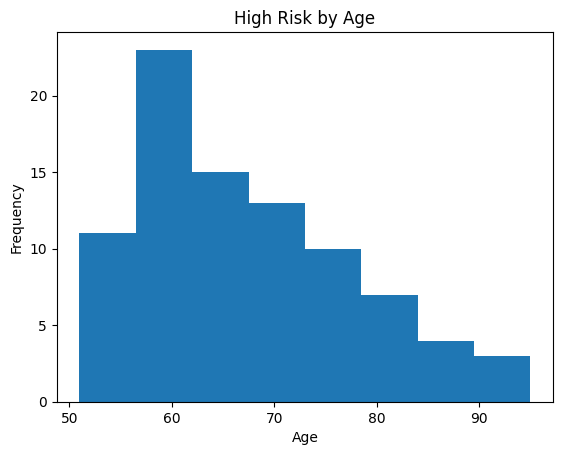

In [63]:
import matplotlib.pyplot as plt
# Add the 'risk' variable
data_hf['risk'] = data_hf.apply(lambda row: 'High' if row['age'] > 50 and row['serum_creatinine'] > 1.2 else 'Low', axis=1)

# Visualize high risk by age
high_risk = data_hf[data_hf['risk'] == 'High']
plt.hist(high_risk['age'], bins='auto')
plt.title('High Risk by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Vizualizujte vysoké riziko úmrtia pre jednotlivé vekové skupiny histogramom:

Hint: Použite metódu `hist` z knižnice `matplotlib.pyplot` na vizualizáciu distribúcie veku pre pacientov s vysokým rizikom úmrtia.

**V akom veku je riziko zlyhania srdca najväčšie?**

In [ ]:
freq = high_risk["age"].value_counts()
max_age = freq.idxmax()
print("V akom veku je riziko zlyhania srdca najväčšie:", max_age)


V akom veku je riziko zlyhania srdca najväčšie: 60.0


**Koľko záznamov (približne) je v datasete v tejto vekovej kategórii?**

In [96]:
freq_all = data_hf["age"].value_counts()
max_count = freq_all[max_age]
print("Počet záznamov v datasete (low, high) v tejto vekovej kategórii: ", max_count)

Počet záznamov v datasete (low, high) v tejto vekovej kategórii:  33


### Úloha 5 (1b)

Analyzujte koreláciu medzi všetkými atribútmi tohto datasetu (napr. vytvorením correlation plot)

Hint: Nenumerické atribúty môžete pred vytvorením korelačnej matice odstrániť.

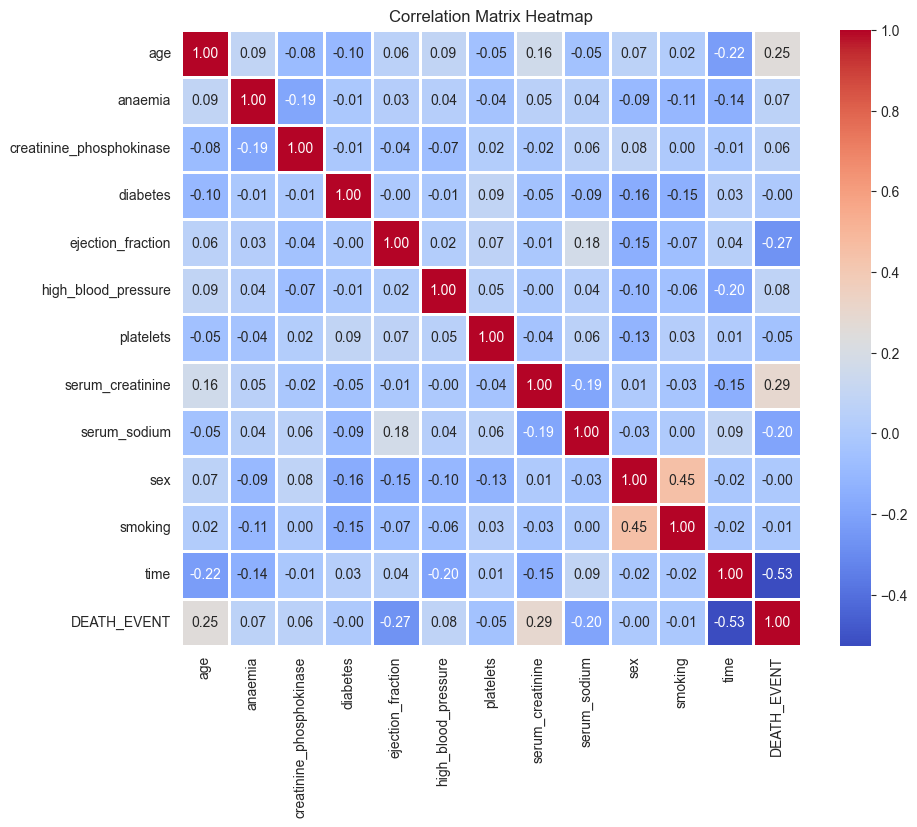

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#odstáni num stlpce
numeric_cols = data_hf.select_dtypes(include=[np.number])

#vypočíta korelačnú maticu
corr_matrix = numeric_cols.corr()

#print("Korelačná matica:")
#print(corr_matrix)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths = 1)
plt.title("Correlation Matrix Heatmap")
plt.show()

Vizualizujte vysoké riziko úmrtia pre jednotlivé vekové skupiny histogramom:

Hint: Použite metódu `hist` z knižnice `matplotlib.pyplot` na vizualizáciu distribúcie veku pre pacientov s vysokým rizikom úmrtia.

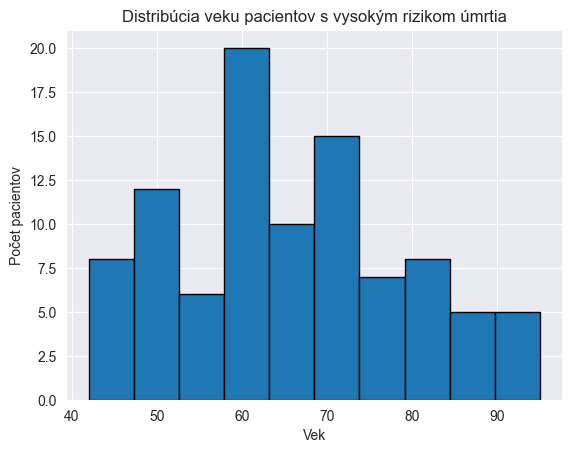

In [22]:
import matplotlib.pyplot as plt

# Filtrovanie pacientov (death_event = 1)
high_risk_patients = data_hf[data_hf["DEATH_EVENT"] == 1]["age"]

plt.hist(high_risk_patients, bins=10, edgecolor='black', alpha=1)
plt.xlabel("Vek")
plt.ylabel("Počet pacientov")
plt.title("Distribúcia veku pacientov s vysokým rizikom úmrtia")
plt.show()

**Ktoré atribúty majú medzi sebou najväčšiu zápornú koreláciu?** (uveďte prvé dve dvojice)

In [14]:
corr_pairs = corr_matrix.unstack()
sorted_corr = corr_pairs.sort_values(ascending=True)

print("Najsilnejšie záporné korelácie (prvé dve):")
print(sorted_corr.head(2))

Najsilnejšie záporné korelácie (prvé dve):
DEATH_EVENT  time          -0.526964
time         DEATH_EVENT   -0.526964
dtype: float64


**Ktoré atribúty majú medzi sebou najväčšiu kladnú koreláciu?** (uveďte prvú dvojicu)

In [15]:
sorted_corr = corr_pairs.sort_values(ascending=False)
print("Najsilnejšie kladné korelácie (prvá dvojica):")
print(sorted_corr.head(1))

Najsilnejšie kladné korelácie (prvá dvojica):
age  age    1.0
dtype: float64


----

Viac informácií o zlyhaní srdca: https://www.nhlbi.nih.gov/health/heart-failure